In [1]:
import os      #importing the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn import metrics
import seaborn as seabornInstance 
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import linear_model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#setting the directory

os.chdir('U:\\More Data')

In [3]:
#importing  the data sets

dt=pd.read_excel('LUSC.xlsx',index_col=0) 

In [4]:
dt.shape

(501, 14885)

In [5]:
X=dt.iloc[:,0:14883].values
y=dt.iloc[:,-1].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_val = sc_X.fit_transform(X_val)

sc_y = StandardScaler()
y_train = np.squeeze(sc_y.fit_transform(y_train.reshape(-1, 1)))
y_val = np.squeeze(sc_y.fit_transform(y_val.reshape(-1, 1)))
y_test = np.squeeze(sc_y.fit_transform(y_test.reshape(-1, 1)))

In [9]:

#Applying Linear Regression
lm=linear_model.LinearRegression()
model=lm.fit(X_train,y_train)
y_predval=lm.predict(X_val)

In [10]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))
print('Variance score: %.2f' % model.score(X_val, y_val))

0.789712489771707
0.9965918228863895
0.9982944570047404
Variance score: 0.00


In [11]:
# KFOlD
estimator = model
kfold = KFold(n_splits=2, random_state=0)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print(results)
print(results.mean(), results.std())

[-0.1004644  -0.22078741]
-0.16062590553456624 0.06016150398959775


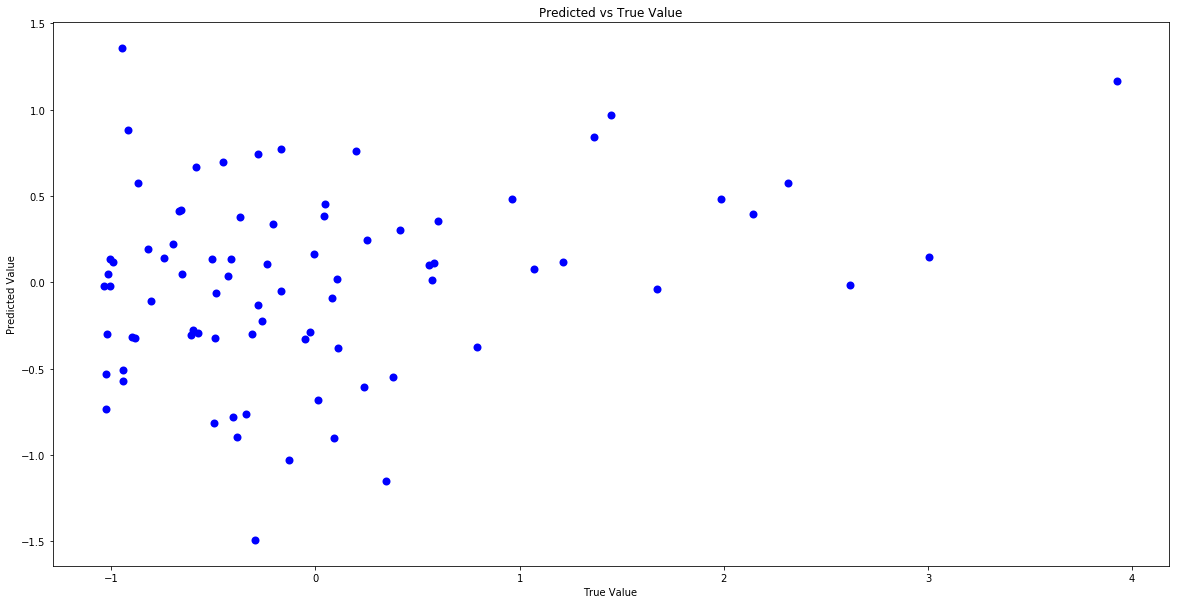

In [12]:

plt.figure(figsize=(20,10))
plt.scatter(y_val, y_predval, color='blue', linewidth=2)
plt.title('Predicted vs True Value')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()

In [13]:

# Hyper parameter optimization

tuned_parameters = {'fit_intercept':[True,False],
                     'n_jobs':[-1,1]}
lm=linear_model.LinearRegression()
grid=GridSearchCV(model,tuned_parameters,scoring='r2',verbose=1)    
grid.fit(X_train,y_train)
print(grid.best_estimator_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    2.6s finished


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=False)


In [19]:
#Appying model again on best parameters

lm=linear_model.LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=False)
model=lm.fit(X_train,y_train)
y_predval=lm.predict(X_val)

In [20]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))
print('Variance score: %.2f' % model.score(X_val, y_val))

0.7897124897717072
0.9965918228863876
0.9982944570047394
Variance score: 0.00


In [ ]:
'''APPLYING MODEL ON TESTING DATA'''

In [21]:
lm.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lm.predict(X_test)

# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % lm.score(X_test, y_test))

2.178613635518397
192.0366347009125
13.857728338400651
Variance score: -191.04


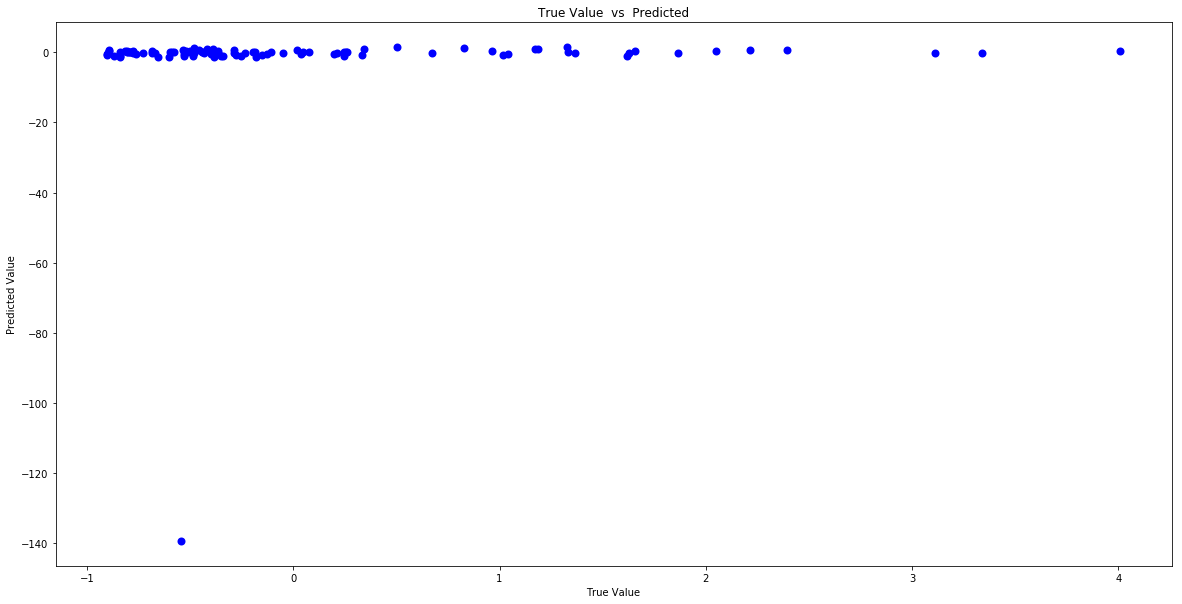

In [22]:
#Ploting the True value vs predicted value

plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred, color='blue', linewidth=2)
plt.title('True Value  vs  Predicted')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()